# Lab 4- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat Lab 4, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="/data/afarbin/DLClass/SUSY/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi"]
FeatureNames=[ "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [2]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


Now lets setup everything. Note that you will need to use a GPU to get reasonable training times. The Jupyter server will have up tp 4 GPUs in it. Your Jupyter session is now running through a batch queue system that effectively assigns a GPU to you. Here we tell Keras's backend, Theano, to use the GPU assigned to you.

In [3]:
import os 
print "Using Queue:", os.environ["PBS_QUEUE"]
gpuid=int(os.environ["PBS_QUEUE"][3:4])
print "Using GPU:", gpuid
os.environ['THEANO_FLAGS'] = "mode=FAST_RUN,device=gpu%s,floatX=float32,force_device=True" % (gpuid)

Using Queue: gpu3theco_ipynb
Using GPU: 3


There was some problem getting the profiler to work in this notebook, so we turn it off: 

In [5]:
import theano
theano.config.profile=False

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 3: TITAN X (Pascal) (CNMeM is disabled, cuDNN 7103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:631: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.1.
  warnings.warn(warn)


Exception: The nvidia driver version installed with this OS does not give good results for reduction.Installing the nvidia driver available on the same download page as the cuda package will fix the problem: http://developer.nvidia.com/cuda-downloads

Now we will build a simple model, as described in class. Note that this is very small model, so things run fast. You should attempt more ambitious models.

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Couldn't import dot_parser, loading of dot files will not be possible.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform", input_dim=18)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


The model has to be compiled. At this time we set the loss function and the optimizer too:

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


Now we train. We are running only 10 epochs in this example. Models may need hundreds of epochs before they stop improving.

In [7]:
history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

/usr/local/lib/python2.7/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 500000 samples, validate on 50000 samples
Epoch 1/10
500000/500000 [==============================] - 14s - loss: 0.5669 - acc: 0.7222 - val_loss: 0.4632 - val_acc: 0.7860
Epoch 2/10
500000/500000 [==============================] - 1s - loss: 0.4538 - acc: 0.7920 - val_loss: 0.4542 - val_acc: 0.7896
Epoch 3/10
500000/500000 [==============================] - 2s - loss: 0.4472 - acc: 0.7948 - val_loss: 0.4477 - val_acc: 0.7929
Epoch 4/10
500000/500000 [==============================] - 1s - loss: 0.4418 - acc: 0.7967 - val_loss: 0.4437 - val_acc: 0.7937
Epoch 5/10
500000/500000 [==============================] - 1s - loss: 0.4392 - acc: 0.7974 - val_loss: 0.4415 - val_acc: 0.7949
Epoch 6/10
500000/500000 [==============================] - 1s - loss: 0.4379 - acc: 0.7982 - val_loss: 0.4404 - val_acc: 0.7954
Epoch 7/10
500000/500000 [==============================] - 2s - loss: 0.4371 - acc: 0.7984 - val_loss: 0.4414 - val_acc: 0.7939
Epoch 8/10
500000/500000 [===================

The model history keeps track of the loss and accuracy for each epoch. Note that the training above was setup to run on the validation sample at the end of each epoch:

In [8]:
print history.history

{'acc': [0.7222180000114441, 0.7919719999961853, 0.7948039999885559, 0.7966859999885559, 0.7974180000152588, 0.7982259999847412, 0.7984460000152588, 0.7987360000152588, 0.7988859999923706, 0.7990760000076294], 'loss': [0.5668936553878784, 0.45376287375640867, 0.4472283467655182, 0.4417801669521332, 0.4392345532341003, 0.4378630105571747, 0.43707853593444823, 0.4365833639831543, 0.43595959176826476, 0.43566440569496157], 'val_acc': [0.7859600002288818, 0.7896400003242493, 0.7929400003242493, 0.7937200002288818, 0.794899999961853, 0.7954200003242493, 0.793899999961853, 0.7950400002479553, 0.795679999961853, 0.795779999961853], 'val_loss': [0.4632495581626892, 0.45417937823295595, 0.4476907738208771, 0.4437257072162628, 0.4414649100589752, 0.4404082924747467, 0.44143788818359375, 0.44001743877410887, 0.4391783331012726, 0.4386809588527679]}


## Exercise 5.1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

    * Has you model's performance plateaued? If not train for more epochs. 

    * Compare the performance on training versus test sample. Are you over training?

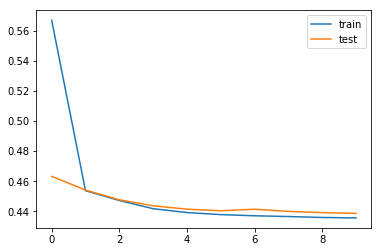

In [12]:
## Your Solution Here
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

We can evaluate how the trained model does on the test sample as follows:

In [9]:
scores = model.evaluate(X_Test, y_Test)
print scores

49568/50000 [============================>.] - ETA: 0s[0.43868096158981323, 0.79578]


And we can make ROC curves as before:

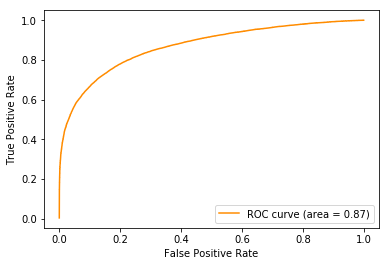

In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Exercise 5.2

Following lab 4, make a comparison of the performance between models trained with raw, features, and raw+features data.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform", input_dim=6)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________
Train on 500000 samples, validate on 50000 samples
Epoch 1/10
500000/500000 [==============================] - 1s - loss: 0.6353 - acc: 0.6392 - val_loss: 0.5654 - val_acc: 0.7198
Epoch 2/10
500000/500000 [==============================] - 1s - loss: 0.5568 - acc: 0.7235 - val_loss: 0.5532 - val_acc: 0.7270
Epoch 3/10
500000/500000 [==============================] - 1s - loss: 0.5522 - acc: 0.7256 - val_l

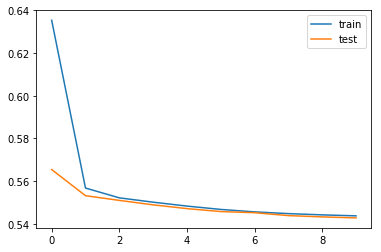

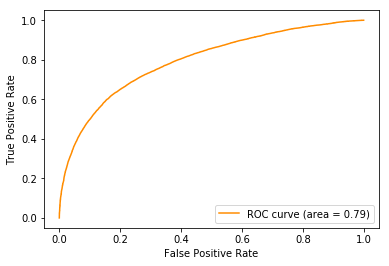

In [15]:
## Your solution here


# Raw only

import numpy as np

N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:7]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:7]])
y_Test=np.array(Test_Sample["signal"])


from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

scores = model.evaluate(X_Test, y_Test)
print scores

from sklearn.metrics import roc_curve, auc
fpr1, tpr1, _ = roc_curve(y_Test, model.predict(X_Test))
 
fig=plt.figure()
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1,tpr1,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform", input_dim=12)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________
Train on 500000 samples, validate on 50000 samples
Epoch 1/10
500000/500000 [==============================] - 2s - loss: 0.5777 - acc: 0.7224 - val_loss: 0.4832 - val_acc: 0.7725
Epoch 2/10
500000/500000 [==============================] - 1s - loss: 0.4736 - acc: 0.7782 - val_loss: 0.4741 - val_acc: 0.7785
Epoch 3/10
500000/500000 [==============================] - 1s - loss: 0.4676 - acc: 0.7807 - val_l

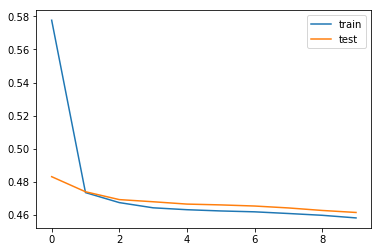

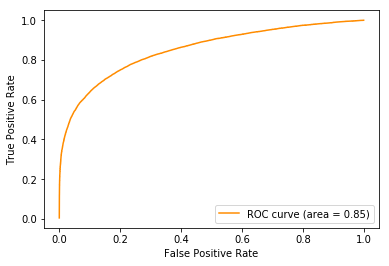

In [16]:
# Feature only

import numpy as np

N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[7:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[7:]])
y_Test=np.array(Test_Sample["signal"])


from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

scores = model.evaluate(X_Test, y_Test)
print scores

from sklearn.metrics import roc_curve, auc
fpr2, tpr2, _ = roc_curve(y_Test, model.predict(X_Test))
 
fig=plt.figure()
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr2,tpr2,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc2)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

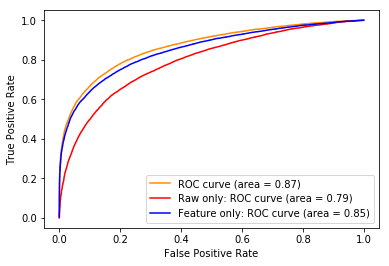

In [17]:
fig=plt.figure()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr1,tpr1,color='r',label='Raw only: ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2,tpr2,color='b',label='Feature only: ROC curve (area = %0.2f)' % roc_auc2)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Exercise 5.3

Again, following lab 4, design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Couldn't import dot_parser, loading of dot files will not be possible.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=18)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1216      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________
Train on 500000 samples, validate on 50000 samples
Epoch 1/10
500000/500000 [==============================] - 13s - loss: 0.5277 - acc: 0.7587 - val_loss: 0.4596 - val_acc: 0.7860
Epoch 2/10
500000/500000 [==============================] - 1s - loss: 0.4496 - acc: 0.7934 - val_loss: 0.4505 - val_acc: 0.7917
Epoch 3/10
500000/500000 [==============================] - 1s - loss: 0.4430 - acc: 0.7957 - 

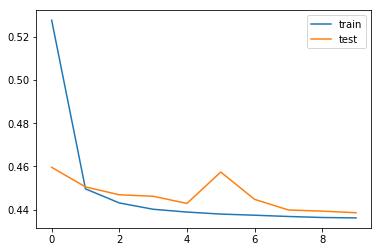

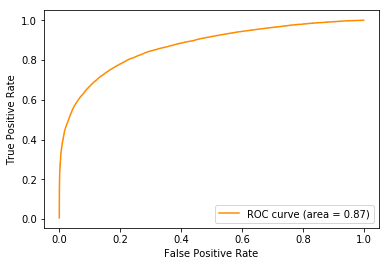

In [2]:
## Your solution here
"""Method 1"""

import numpy as np

N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

scores = model.evaluate(X_Test, y_Test)
print scores

from sklearn.metrics import roc_curve, auc
fpr1, tpr1, _ = roc_curve(y_Test, model.predict(X_Test))
 
fig=plt.figure()
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1,tpr1,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Couldn't import dot_parser, loading of dot files will not be possible.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=18)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________
Train on 500000 samples, validate on 50000 samples
Epoch 1/10
500000/500000 [==============================] - 12s - loss: 0.5073 - acc: 0.7

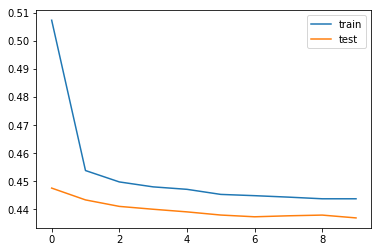

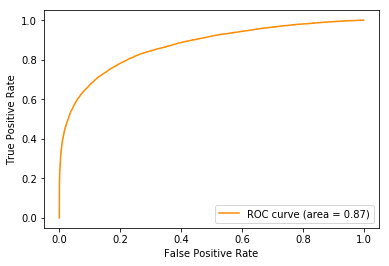

In [2]:
## Your solution here
"""Method 2"""

import numpy as np

N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, init='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=10, batch_size=2048)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

scores = model.evaluate(X_Test, y_Test)
print scores

from sklearn.metrics import roc_curve, auc
fpr1, tpr1, _ = roc_curve(y_Test, model.predict(X_Test))
 
fig=plt.figure()
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1,tpr1,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform", input_dim=18)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________
Train on 500000 samples, validate on 50000 samples
Epoch 1/20
500000/500000 [==============================] - 1s - loss: 0.2485 - acc: 0.5416 - val_loss: 0.2482 - val_acc: 0.5399
Epoch 2/20
500000/500000 [==============================] - 1s - loss: 0.2475 - acc: 0.5415 - val_loss: 0.2466 - val_acc: 0.5399
Epoch 3/20
500000/500000 [==============================] - 1s - loss: 0.2388 - acc: 0.6271 - v

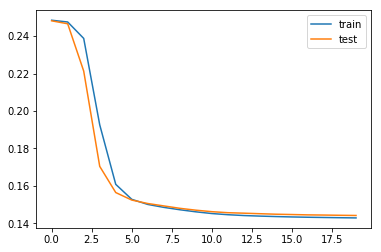

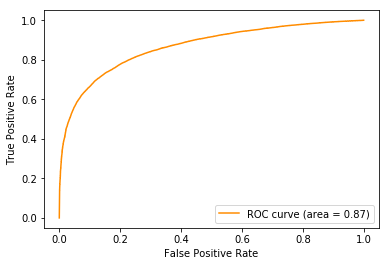

In [9]:
## Your solution here
"""Method 3"""

import numpy as np

N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, input_dim=X_Train.shape[1], init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

history=model.fit(X_Train, y_Train, validation_data=(X_Test,y_Test), nb_epoch=20, batch_size=2048)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

scores = model.evaluate(X_Test, y_Test)
print scores

from sklearn.metrics import roc_curve, auc
fpr1, tpr1, _ = roc_curve(y_Test, model.predict(X_Test))
 
fig=plt.figure()
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1,tpr1,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Honors Problem- Exercise 5.4

Write a function that evaluates the performance (AUC) as a function of a given input variable. You will need to bin the test data in the variable (i.e. make sub-samples for events which have the particular variable in a range), evaluate the performance in each bin, and plot the results.

Apply your function to each input variable.